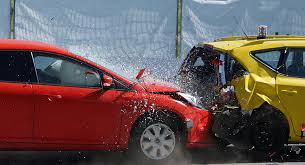

# Seattle-Data Analysis of Accident Severity

## Introduction <a id="0"></a>

We will be analysing data collision dataset given in the course to understand the severity of accidents which have taken place from the year January 2004 till May 2020 in the city of Seattle( United States). The analysis can throw light on the major factors that contribute to the causes of accidents and a way in which we can search for a pattern in the data so that the hospital authorities or emergency services can be informed in advance and they can be prepared to handle the situation

In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
print('imported')

imported


In [2]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_389dc21962864c689344089ad904e26f = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='iNLfIbUIBQtcI3VcU8YcqS5Ip91_mqxF1dLyDxHGKkpd',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/
streaming_body_1 = client_389dc21962864c689344089ad904e26f.get_object(Bucket='capstoneprojectseattleaccidentsev-donotdelete-pr-2zj2yhasrzv65l', Key='Car crash photo.jpg')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(streaming_body_1, "__iter__"): streaming_body_1.__iter__ = types.MethodType( __iter__, streaming_body_1 ) 


In [3]:

body = client_389dc21962864c689344089ad904e26f.get_object(Bucket='capstoneprojectseattleaccidentsev-donotdelete-pr-2zj2yhasrzv65l',Key='Data-Collisions (4).csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


## Data cleansing  <a id="1"></a>

In [4]:
## Removing below columns which are not needed

del df_data_1['X']
del df_data_1['Y']
del df_data_1['OBJECTID']
del df_data_1['INCKEY']
del df_data_1['COLDETKEY']
del df_data_1['INTKEY']
del df_data_1['CROSSWALKKEY']
df_data_1.head()

,SEVERITYCODE,REPORTNO,STATUS,ADDRTYPE,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,...,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,HITPARKEDCAR
0,2,3502005,Matched,Intersection,5TH AVE NE AND NE 103RD ST,,NaN,2,Injury Collision,Angles,...,Overcast,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,N
1,1,2607959,Matched,Block,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,NaN,NaN,1,Property Damage Only Collision,Sideswipe,...,Raining,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,N
2,1,1482393,Matched,Block,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,NaN,NaN,1,Property Damage Only Collision,Parked Car,...,Overcast,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,N
3,1,3503937,Matched,Block,2ND AVE BETWEEN MARION ST AND MADISON ST,,NaN,1,Property Damage Only Collision,Other,...,Clear,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,N
4,2,1807429,Matched,Intersection,SWIFT AVE S AND SWIFT AV OFF RP,NaN,NaN,2,Injury Collision,Angles,...,Raining,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,N


In [5]:
## Cleansing data in Under Influence column
df_data_1['UNDERINFL'] = df_data_1['UNDERINFL'].replace(np.nan, 0)
df_data_1["UNDERINFL"].replace({"0": "N", "1": "Y"}, inplace=True)

In [6]:
## Replacing NAN values in Speeding column to 0
df_data_1['SPEEDING'] = df_data_1['SPEEDING'].replace(np.nan, 0)

In [7]:
df_data_1.head()

,SEVERITYCODE,REPORTNO,STATUS,ADDRTYPE,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,...,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,HITPARKEDCAR
0,2,3502005,Matched,Intersection,5TH AVE NE AND NE 103RD ST,,NaN,2,Injury Collision,Angles,...,Overcast,Wet,Daylight,NaN,NaN,0,10,Entering at angle,0,N
1,1,2607959,Matched,Block,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,NaN,NaN,1,Property Damage Only Collision,Sideswipe,...,Raining,Wet,Dark - Street Lights On,NaN,6354039.0,0,11,From same direction - both going straight - bo...,0,N
2,1,1482393,Matched,Block,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,NaN,NaN,1,Property Damage Only Collision,Parked Car,...,Overcast,Dry,Daylight,NaN,4323031.0,0,32,One parked--one moving,0,N
3,1,3503937,Matched,Block,2ND AVE BETWEEN MARION ST AND MADISON ST,,NaN,1,Property Damage Only Collision,Other,...,Clear,Dry,Daylight,NaN,NaN,0,23,From same direction - all others,0,N
4,2,1807429,Matched,Intersection,SWIFT AVE S AND SWIFT AV OFF RP,NaN,NaN,2,Injury Collision,Angles,...,Raining,Wet,Daylight,NaN,4028032.0,0,10,Entering at angle,0,N


## Exploratory Data Analysis- Line graphs

In [8]:
## Data Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# we are using the inline backend
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print('imported')

imported


In [9]:
###Creating new column 'year' from the column INCDATE
df_data_1['year'] = pd.DatetimeIndex(df_data_1['INCDATE']).year
df_data_1.head()

,SEVERITYCODE,REPORTNO,STATUS,ADDRTYPE,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,HITPARKEDCAR,year
0,2,3502005,Matched,Intersection,5TH AVE NE AND NE 103RD ST,,NaN,2,Injury Collision,Angles,...,Wet,Daylight,NaN,NaN,0,10,Entering at angle,0,N,2013
1,1,2607959,Matched,Block,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,NaN,NaN,1,Property Damage Only Collision,Sideswipe,...,Wet,Dark - Street Lights On,NaN,6354039.0,0,11,From same direction - both going straight - bo...,0,N,2006
2,1,1482393,Matched,Block,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,NaN,NaN,1,Property Damage Only Collision,Parked Car,...,Dry,Daylight,NaN,4323031.0,0,32,One parked--one moving,0,N,2004
3,1,3503937,Matched,Block,2ND AVE BETWEEN MARION ST AND MADISON ST,,NaN,1,Property Damage Only Collision,Other,...,Dry,Daylight,NaN,NaN,0,23,From same direction - all others,0,N,2013
4,2,1807429,Matched,Intersection,SWIFT AVE S AND SWIFT AV OFF RP,NaN,NaN,2,Injury Collision,Angles,...,Wet,Daylight,NaN,4028032.0,0,10,Entering at angle,0,N,2004


In [10]:
### Creating new column 'month' from column INCDATE to perform month on month analysis
df_data_1['month'] = pd.DatetimeIndex(df_data_1['INCDATE']).month
df_data_1.head()

,SEVERITYCODE,REPORTNO,STATUS,ADDRTYPE,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,...,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,HITPARKEDCAR,year,month
0,2,3502005,Matched,Intersection,5TH AVE NE AND NE 103RD ST,,NaN,2,Injury Collision,Angles,...,Daylight,NaN,NaN,0,10,Entering at angle,0,N,2013,3
1,1,2607959,Matched,Block,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,NaN,NaN,1,Property Damage Only Collision,Sideswipe,...,Dark - Street Lights On,NaN,6354039.0,0,11,From same direction - both going straight - bo...,0,N,2006,12
2,1,1482393,Matched,Block,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,NaN,NaN,1,Property Damage Only Collision,Parked Car,...,Daylight,NaN,4323031.0,0,32,One parked--one moving,0,N,2004,11
3,1,3503937,Matched,Block,2ND AVE BETWEEN MARION ST AND MADISON ST,,NaN,1,Property Damage Only Collision,Other,...,Daylight,NaN,NaN,0,23,From same direction - all others,0,N,2013,3
4,2,1807429,Matched,Intersection,SWIFT AVE S AND SWIFT AV OFF RP,NaN,NaN,2,Injury Collision,Angles,...,Daylight,NaN,4028032.0,0,10,Entering at angle,0,N,2004,1


In [11]:
df_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 33 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   REPORTNO        194673 non-null  object 
 2   STATUS          194673 non-null  object 
 3   ADDRTYPE        192747 non-null  object 
 4   LOCATION        191996 non-null  object 
 5   EXCEPTRSNCODE   84811 non-null   object 
 6   EXCEPTRSNDESC   5638 non-null    object 
 7   SEVERITYCODE.1  194673 non-null  int64  
 8   SEVERITYDESC    194673 non-null  object 
 9   COLLISIONTYPE   189769 non-null  object 
 10  PERSONCOUNT     194673 non-null  int64  
 11  PEDCOUNT        194673 non-null  int64  
 12  PEDCYLCOUNT     194673 non-null  int64  
 13  VEHCOUNT        194673 non-null  int64  
 14  INCDATE         194673 non-null  object 
 15  INCDTTM         194673 non-null  object 
 16  JUNCTIONTYPE    188344 non-null  object 
 17  SDOT_COLCO

In [12]:
df_data_1.shape

(194673, 33)

### The Dataset contains 194673 rows and 33 column

In [13]:
df_data_1['SEVERITYCODE'].describe

<bound method NDFrame.describe of 0         2
1         1
2         1
3         1
4         2
         ..
194668    2
194669    1
194670    2
194671    2
194672    1
Name: SEVERITYCODE, Length: 194673, dtype: int64>

In [14]:
# we are using the inline backend
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [15]:
df_data_1['SEVERITYDESC'].value_counts().to_frame()

,SEVERITYDESC
Property Damage Only Collision,136485
Injury Collision,58188


### The number of incidents by above analysis show that Injury collilision cases are 29.89% of total cases. In the rest 70.10% ,only property was damaged

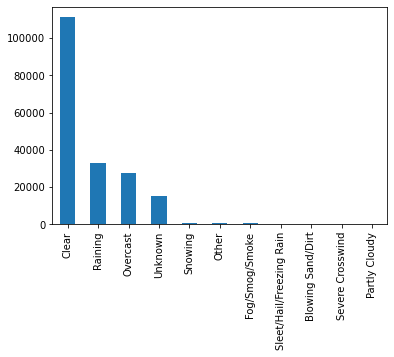

In [45]:
df_data_1['WEATHER'].value_counts().plot(kind='bar')

### Analysis shows that in 57% cases when accident took place the weather was Clear follwed by raining, overcast, snow and unknown reasons.

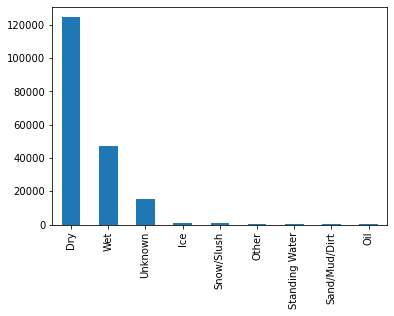

In [46]:
df_data_1['ROADCOND'].value_counts().plot(kind='bar')

### Analysis shows that in 70% accidents, the road condition was dry followed by wet, unknown ,ice and snow

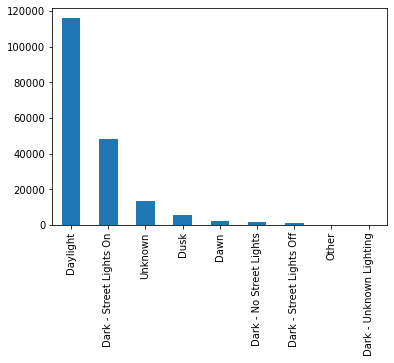

In [47]:
df_data_1['LIGHTCOND'].value_counts().plot(kind='bar')

### Close to 60% accident cases had light condition as broad daylight followed by dark street light on

In [115]:
df_data_1["UNDERINFL"]=df_data_1['UNDERINFL'].replace(to_replace=[np.NaN,0],value='N')
df_data_1["UNDERINFL"].replace({"0": "N", "1": "Y"}, inplace=True)
print('Done')

Done


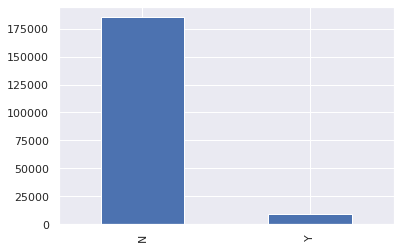

In [116]:
df_data_1['UNDERINFL'].value_counts().plot(kind='bar')

### 92% cases the driver was not under the influence of alcohol

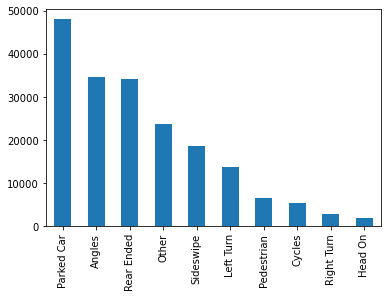

In [34]:
df_data_1['COLLISIONTYPE'].value_counts().plot(kind='bar')

### The collision type suggests that more property damage was done in accidents because 'Parked car' collision type has highest numbers

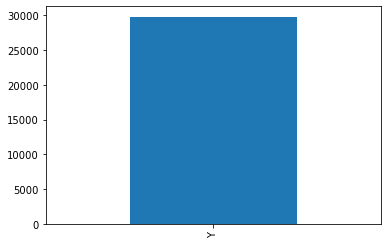

In [35]:
df_data_1['INATTENTIONIND'].value_counts().plot(kind='bar')

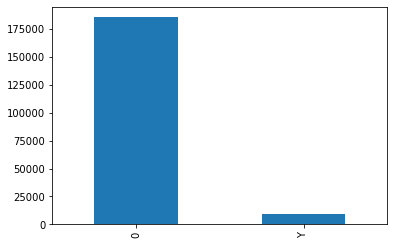

In [36]:
df_data_1['SPEEDING'].value_counts().plot(kind='bar')

###  The below graph shows the year on year cases of accidents that happened from 2004 onwards till May 2020 in Seattle. There is a downward trend in the number of accidents for which the reason needs to be analyzed

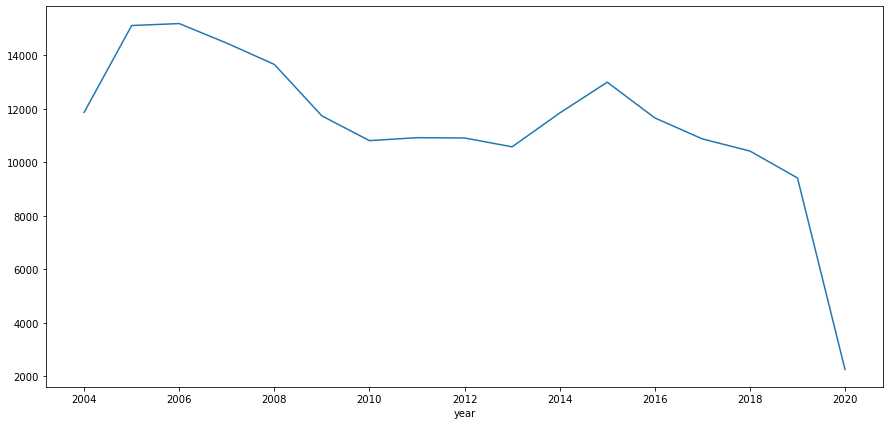

In [37]:
fig, ax = plt.subplots(figsize=(15,7))
df_data_1.groupby(['year']).count()['SEVERITYDESC'].plot(ax=ax)

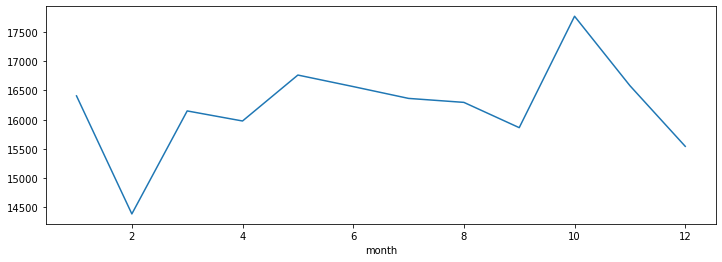

In [38]:

fig, ax = plt.subplots(figsize=(12,4))
df_data_1.groupby(['month']).count()['SEVERITYCODE'].plot(ax=ax)

### The above graph explains that during certain months ( i.e January, March, May, June, July, August, October) the accident count increases. This data can be shared with hospitals and emergency services so that can be prepared for future

## Machine learning alogrithms to predict Severity of Accidents

In [16]:
df_pandas=df_data_1[['SEVERITYCODE','WEATHER','ROADCOND','LIGHTCOND','UNDERINFL','SPEEDING','INATTENTIONIND','SEVERITYDESC','COLLISIONTYPE','PERSONCOUNT','PEDCOUNT']]
df_pandas.head()

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND,UNDERINFL,SPEEDING,INATTENTIONIND,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT
0,2,Overcast,Wet,Daylight,N,0,NaN,Injury Collision,Angles,2,0
1,1,Raining,Wet,Dark - Street Lights On,N,0,NaN,Property Damage Only Collision,Sideswipe,2,0
2,1,Overcast,Dry,Daylight,N,0,NaN,Property Damage Only Collision,Parked Car,4,0
3,1,Clear,Dry,Daylight,N,0,NaN,Property Damage Only Collision,Other,3,0
4,2,Raining,Wet,Daylight,N,0,NaN,Injury Collision,Angles,2,0


In [17]:
#### Data Cleaning for performing machine learning algorithms

df_pandas['ROADCOND'] = df_pandas['ROADCOND'].fillna('Unknown')
df_pandas['WEATHER'] = df_pandas['WEATHER'].fillna('Unknown')
df_pandas['LIGHTCOND'] = df_pandas['LIGHTCOND'].fillna('Unknown')
df_pandas.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND,UNDERINFL,SPEEDING,INATTENTIONIND,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT
0,2,Overcast,Wet,Daylight,N,0,NaN,Injury Collision,Angles,2,0
1,1,Raining,Wet,Dark - Street Lights On,N,0,NaN,Property Damage Only Collision,Sideswipe,2,0
2,1,Overcast,Dry,Daylight,N,0,NaN,Property Damage Only Collision,Parked Car,4,0
3,1,Clear,Dry,Daylight,N,0,NaN,Property Damage Only Collision,Other,3,0
4,2,Raining,Wet,Daylight,N,0,NaN,Injury Collision,Angles,2,0


In [18]:
## Cleansing data in Under Influence, Inattention and Speeding column
df_pandas["UNDERINFL"]=df_pandas['UNDERINFL'].replace(to_replace=[np.NaN,0],value='N')
df_pandas["UNDERINFL"].replace({"0": "N", "1": "Y"}, inplace=True)

df_pandas["INATTENTIONIND"]=df_pandas['INATTENTIONIND'].replace(to_replace=[np.NaN,0],value='N')
df_pandas["SPEEDING"]=df_pandas['SPEEDING'].replace(to_replace=[np.NaN,0],value='N')

df_pandas.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND,UNDERINFL,SPEEDING,INATTENTIONIND,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT
0,2,Overcast,Wet,Daylight,N,N,N,Injury Collision,Angles,2,0
1,1,Raining,Wet,Dark - Street Lights On,N,N,N,Property Damage Only Collision,Sideswipe,2,0
2,1,Overcast,Dry,Daylight,N,N,N,Property Damage Only Collision,Parked Car,4,0
3,1,Clear,Dry,Daylight,N,N,N,Property Damage Only Collision,Other,3,0
4,2,Raining,Wet,Daylight,N,N,N,Injury Collision,Angles,2,0


In [19]:
df_pandas["WEATHER"]=df_pandas['WEATHER'].replace(to_replace=[np.NaN,0],value='Unknown')
df_pandas["ROADCOND"]=df_pandas['ROADCOND'].replace(to_replace=[np.NaN,0],value='Unknown')
df_pandas["LIGHTCOND"]=df_pandas['LIGHTCOND'].replace(to_replace=[np.NaN,0],value='Unknown')

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

In [20]:
## Assigning categories for independent variables used for anlaysis

df_pandas["WEATHER"].replace({"Clear": "0", "Raining": "1","Overcast":"2","Unknown":"3","Snowing":"4","Other":"5","Fog/Smog/Smoke":"6","Sleet/Hail/Freezing Rain":"7","Blowing Sand/Dirt":"8","Severe Crosswind":"9","Partly Cloudy":"10"}, inplace=True)

df_pandas["ROADCOND"].replace({"Dry": "0", "Ice": "1","Oil":"2","Sand/Mud/Dirt":"3","Snow/Slush":"4","Standing Water":"5","Other":"6","Unknown":"7","Wet":"8"}, inplace=True)

df_pandas["LIGHTCOND"].replace({"Daylight": "0", "Dark - Street Lights On": "1","Dark - No Street Lights":"2","Unknown":"3","Dusk":"4","Dawn":"5","Dark - Street Lights Off":"6","Other":"7","Dark - Unknown Lighting":"8"}, inplace=True)


df_pandas.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND,UNDERINFL,SPEEDING,INATTENTIONIND,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT
0,2,2,8,0,N,N,N,Injury Collision,Angles,2,0
1,1,1,8,1,N,N,N,Property Damage Only Collision,Sideswipe,2,0
2,1,2,0,0,N,N,N,Property Damage Only Collision,Parked Car,4,0
3,1,0,0,0,N,N,N,Property Damage Only Collision,Other,3,0
4,2,1,8,0,N,N,N,Injury Collision,Angles,2,0


In [21]:
df_pandas["UNDERINFL"].replace({"N": "0", "Y": "1"}, inplace=True)
df_pandas['UNDERINFL'].head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


0    0
1    0
2    0
3    0
4    0
Name: UNDERINFL, dtype: object

In [22]:
df_pandas["INATTENTIONIND"].replace({"N": "0", "Y": "1"}, inplace=True)
df_pandas['INATTENTIONIND'].head()

0    0
1    0
2    0
3    0
4    0
Name: INATTENTIONIND, dtype: object

In [23]:
df_pandas["SPEEDING"].replace({"N": "0", "Y": "1"}, inplace=True)
df_pandas['SPEEDING'].head()

0    0
1    0
2    0
3    0
4    0
Name: SPEEDING, dtype: object

In [24]:
# Importing required libraries.
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)
print('Imported')

Imported


### Converting Pandas dataframe to Numpy

In [25]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline
print('Imported')

Imported


## To use scikit-learn library, we have to convert the Pandas data frame to a Numpy array


In [26]:
X = df_pandas[['WEATHER', 'ROADCOND','LIGHTCOND']] .values  #.astype(float)
X[0:5]

array([['2', '8', '0'],
       ['1', '8', '1'],
       ['2', '0', '0'],
       ['0', '0', '0'],
       ['1', '8', '0']], dtype=object)

In [27]:
#### What is our label its SEVERITYCODE
y = df_pandas['SEVERITYCODE'].values
y[0:5]

array([2, 1, 1, 1, 2])

#### Normalize Data Data Standardization give data zero mean and unit variance, it is good practice, especially for algorithms such as KNN which is based on distance of cases

In [28]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[ 1.01431444,  1.44226609, -0.61580152],
       [ 0.14651639,  1.44226609,  0.17001297],
       [ 1.01431444, -0.73843785, -0.61580152],
       [-0.72128165, -0.73843785, -0.61580152],
       [ 0.14651639,  1.44226609, -0.61580152]])

In [29]:
## Train Test Split data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (155738, 3) (155738,)
Test set: (38935, 3) (38935,)


## Classification KNN

In [30]:
from sklearn.neighbors import KNeighborsClassifier
print("Imported")

Imported


## Training
#### Lets start the algorithm with k=4 for now:

In [31]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

## Predicting

In [32]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([2, 1, 1, 1, 1])

## Accuracy Evaluation

In [34]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.5418138155106653
Test set Accuracy:  0.5452420701168614


In [35]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.54524207, 0.67111853, 0.6409914 , 0.64553743, 0.62506742,
       0.68003082, 0.67951714, 0.68003082, 0.65203544])

### Plot model accuracy for Different number of Neighbors

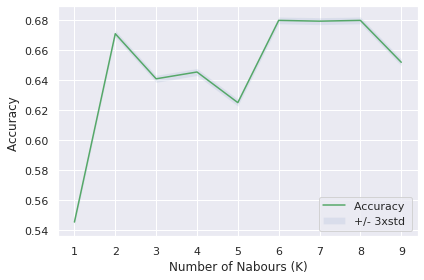

In [36]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabours (K)')
plt.tight_layout()
plt.show()

In [37]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.6800308205984333 with k= 6


## F1 score , Jaccard

In [155]:
## F1 Score for Knn
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.6128762058179589

In [156]:
## Jaccard for KNN
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat)

0.6335208829257737

## Logistic regression- Liblinear

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [61]:
yhat = LR.predict(X_test)
yhat

array([1, 1, 1, ..., 1, 1, 1])

In [62]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.82383529, 0.17616471],
       [0.77966197, 0.22033803],
       [0.82646133, 0.17353867],
       ...,
       [0.65344866, 0.34655134],
       [0.65344866, 0.34655134],
       [0.65344866, 0.34655134]])

In [79]:
## Jaccard for LR
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat)

0.7010145113650956

In [64]:
## F1 score
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.5777979457095509

In [65]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           1       0.70      1.00      0.82     27294
           2       0.00      0.00      0.00     11641

    accuracy                           0.70     38935
   macro avg       0.35      0.50      0.41     38935
weighted avg       0.49      0.70      0.58     38935



/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [66]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.6016231421438462

In [67]:
LR2 = LogisticRegression(C=0.01, solver='sag').fit(X_train,y_train)
yhat_prob2 = LR2.predict_proba(X_test)
print ("LogLoss: : %.2f" % log_loss(y_test, yhat_prob2))

LogLoss: : 0.60


## Logistic Regression -Support Vector Machine

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

In [72]:
yhat = clf.predict(X_test)
yhat [0:5]

array([1, 1, 1, 1, 1])

In [73]:
## F1 for SVM
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted')

0.5777979457095509

In [80]:
## Jaccard for SVM
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat)

0.7010145113650956

In [39]:
clf2 = svm.SVC(kernel='rbf')
clf2.fit(X_train, y_train) 
yhat2 = clf2.predict(X_test)
print("Avg F1-score: %.4f" % f1_score(y_test, yhat2, average='weighted'))
print("Jaccard score: %.4f" % jaccard_score(y_test, yhat2))

Avg F1-score: 0.5441
Jaccard score: 0.2798


In [ ]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

In [ ]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

In [76]:
clf2 = LogisticRegression(C=0.01, solver='sag').fit(X_train,y_train)
yhat_prob2 = clf2.predict_proba(X_test)
print ("LogLoss: : %.2f" % log_loss(y_test, yhat_prob2))

LogLoss: : 0.60


## Tree Model

In [129]:
X = df_pandas[['WEATHER', 'ROADCOND','LIGHTCOND','UNDERINFL','SPEEDING']] .values  #.astype(float)
X[0:5]

array([['2', '8', '0', '0', '0'],
       ['1', '8', '1', '0', '0'],
       ['2', '0', '0', '0', '0'],
       ['0', '0', '0', '0', '0'],
       ['1', '8', '0', '0', '0']], dtype=object)

In [130]:
y = df_pandas["SEVERITYCODE"]
y[0:5]

0    2
1    1
2    1
3    1
4    2
Name: SEVERITYCODE, dtype: int64

In [131]:
from sklearn.model_selection import train_test_split

In [132]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [133]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [134]:
drugTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [135]:
predTree = drugTree.predict(X_testset)

In [70]:
print (predTree [0:5])
print (y_testset [0:5])

[1 1 1 1 1]
188393    1
191329    1
52824     1
42414     2
114021    1
Name: SEVERITYCODE, dtype: int64


In [71]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.6994109790760591


### Rebuilding Logistic Regression model after down sampling

In [27]:
df_pandas['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
print('Imported')

Imported


#### Down-sample Majority Class
Down-sampling involves randomly removing observations from the majority class to prevent its signal from dominating the learning algorithm. Since the target variable has imbalanced values, we will down sample Class 1 to match with Class 2 observations

In [29]:
from sklearn.utils import resample
print('Imported')

Imported


In [30]:
# Downsample majority classPython

# Separate majority and minority classes
df_majority = df_pandas[df_pandas.SEVERITYCODE==1]
df_minority = df_pandas[df_pandas.SEVERITYCODE==2]

# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=58188,     # to match minority class
                                 random_state=123) # reproducible results

# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
df_downsampled.SEVERITYCODE.value_counts()
# 1    49
# 0    49
# Name: balance, dtype: int64

2    58188
1    58188
Name: SEVERITYCODE, dtype: int64

In [42]:
X = df_downsampled[['WEATHER', 'ROADCOND','LIGHTCOND']] .values  #.astype(float)
X[0:5]

array([['1', '8', '1'],
       ['0', '0', '0'],
       ['3', '7', '3'],
       ['0', '0', '0'],
       ['0', '0', '0']], dtype=object)

In [43]:
#### What is our label its SEVERITYCODE
y = df_downsampled['SEVERITYCODE'].values
y[0:5]

array([1, 1, 1, 1, 1])

In [44]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[ 0.2039871 ,  1.46760099,  0.21887868],
       [-0.70108753, -0.71773804, -0.58784264],
       [ 2.01413636,  1.19443361,  1.83232133],
       [-0.70108753, -0.71773804, -0.58784264],
       [-0.70108753, -0.71773804, -0.58784264]])

In [45]:
## Train Test Split data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (93100, 3) (93100,)
Test set: (23276, 3) (23276,)


In [46]:
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [47]:
yhat = LR.predict(X_test)
yhat

array([1, 2, 1, ..., 2, 2, 2])

In [48]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.54437975, 0.45562025],
       [0.44594683, 0.55405317],
       [0.60665381, 0.39334619],
       ...,
       [0.44594683, 0.55405317],
       [0.47812468, 0.52187532],
       [0.44594683, 0.55405317]])

In [49]:
## Jaccard
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat)

0.30771754823467645

In [50]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[4689    0]
 [   0    0]]


Confusion matrix, without normalization
[[4689    0]
 [   0    0]]


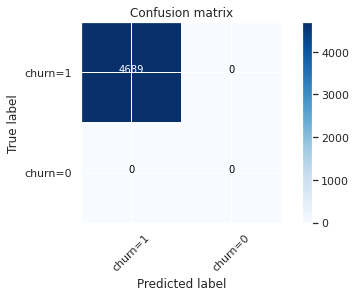

In [51]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [52]:

print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           1       0.56      0.40      0.47     11612
           2       0.54      0.69      0.60     11664

    accuracy                           0.55     23276
   macro avg       0.55      0.55      0.54     23276
weighted avg       0.55      0.55      0.54     23276



## Conclusion

### We have observed that inspite of downsampling the data the Logistic Regression model accuracy is lesser than KNN and Decision tree.

### We can conclude that for our business problem, KNN and Decision Tree Classification models are ideal for predicting the accident severity based on the Weather, Road conditions and Light conditions